In [1]:
## Decision Tree Classifier on Mushroom Dataset from  https://archive.ics.uci.edu/dataset/73/mushroom ##

import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [2]:
# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# Data (as pandas dataframes) 
x = mushroom.data.features 
y = mushroom.data.targets 
  
# Format settings to show more rows and columns when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Change values to numerical
x.replace({'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10,
           'k':11, 'l':12, 'm':13, 'n':14, 'o':15, 'p':16, 'q':17, 'r':18, 's':19,
           't':20, 'u':21, 'v':22, 'w':23, 'x':24, 'y':25, 'z':26,
           '?':0}, inplace=True)


# Show x an y data (uncomment to see)
#print (x.head())
#print(y.head())


C:\Users\ryanl\AppData\Local\Temp\ipykernel_7588\361826264.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.replace({'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10,
C:\Users\ryanl\AppData\Local\Temp\ipykernel_7588\361826264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace({'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10,


In [4]:
# Train/test split and decision tree classifier with a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)


# Evaluate on test set
preds = clf.predict(x_test)
#print ("test accuracy:", accuracy_score(y_test, preds)) # Print test accuracy


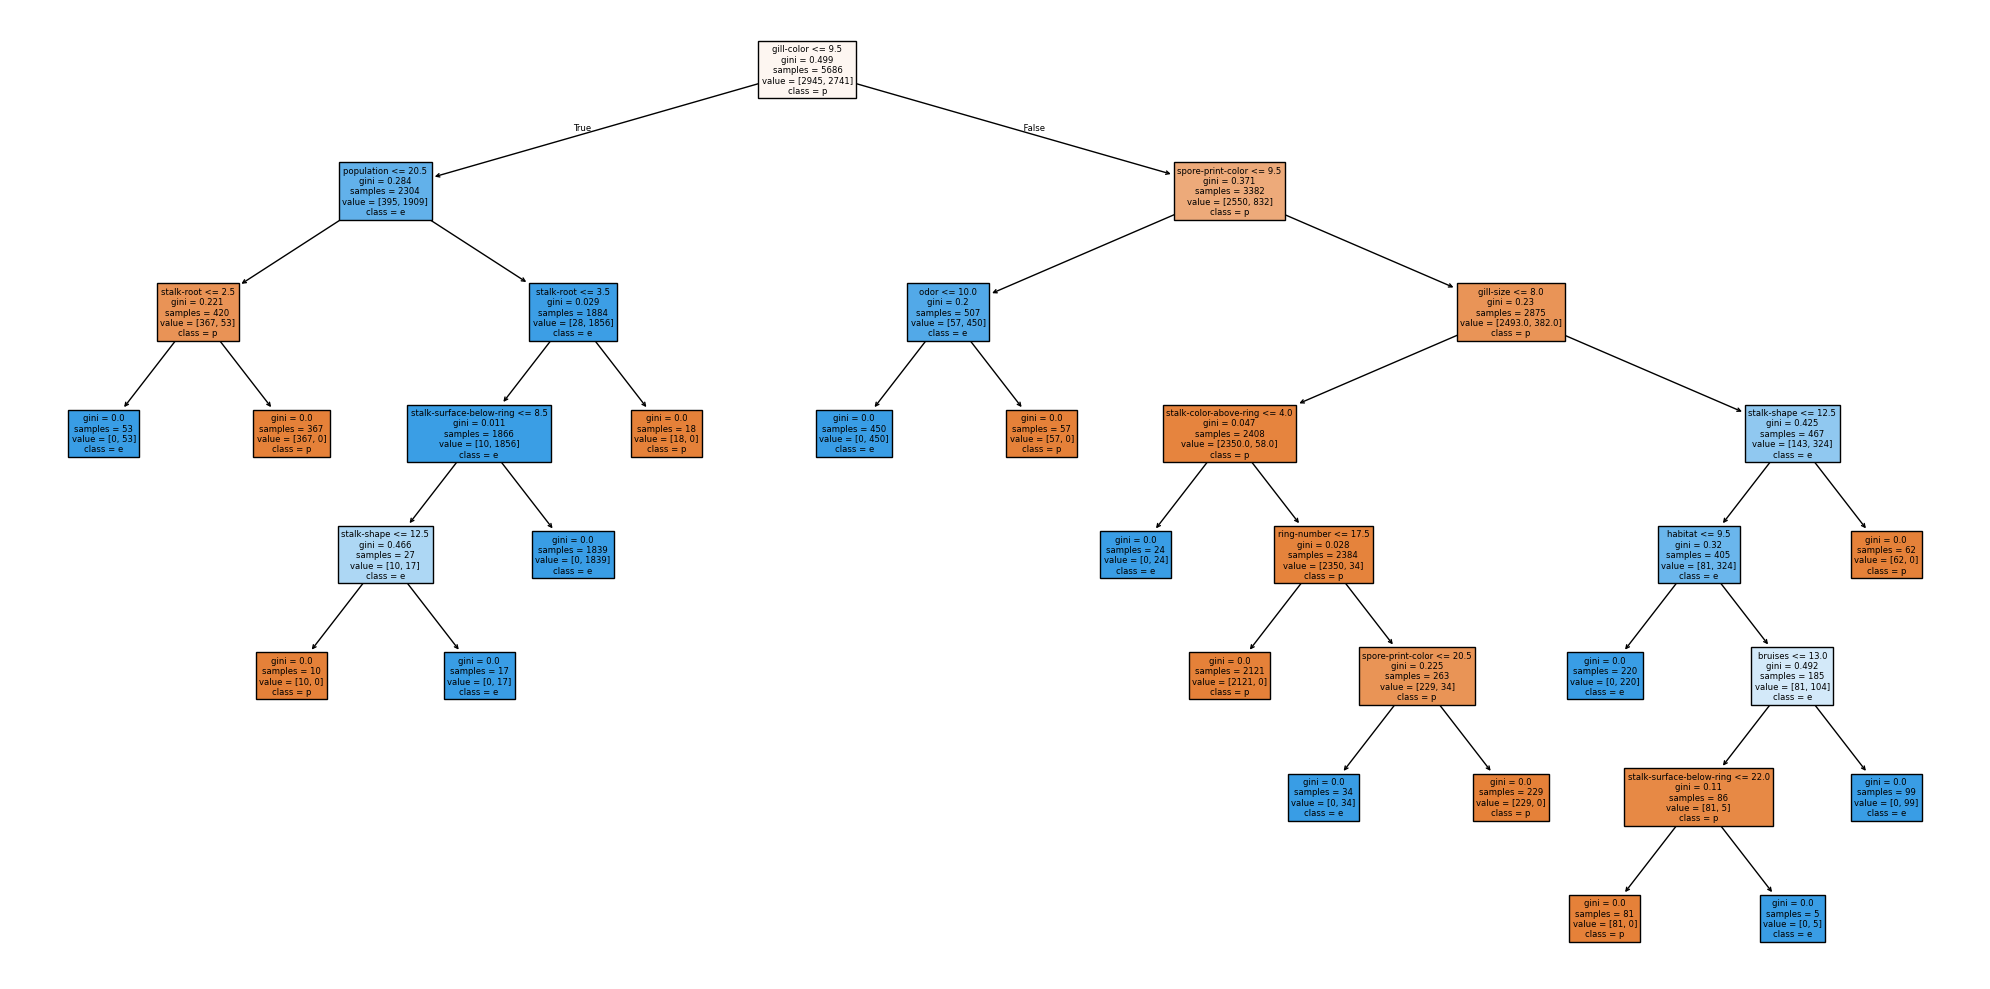

In [5]:
# Plot tree graphically
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x.columns, class_names=y['poisonous'].values, filled=True)
plt.tight_layout()
plt.show()


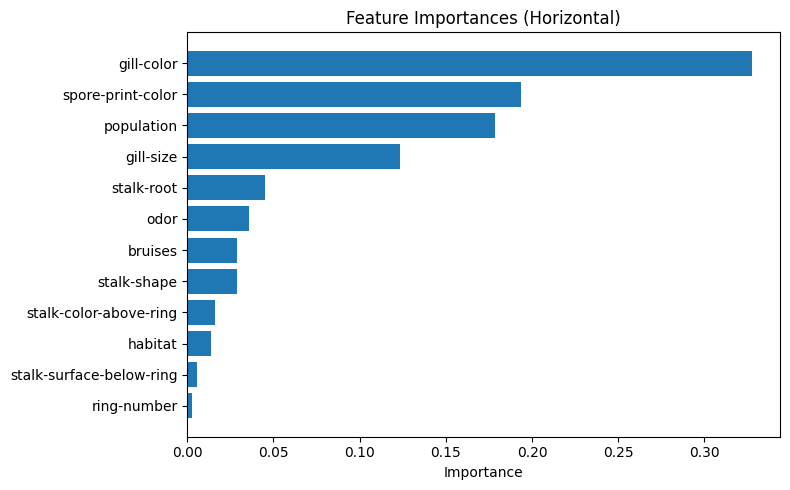

In [6]:
# Find feature importances
feature_names = x.columns
importances = clf.feature_importances_

# Create a DataFrame for readability
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=True)
#print(feat_imp)

# Show feature importance graphically
feat_imp_nonzero = feat_imp[feat_imp["Importance"] > 0] # only include features that have some importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_nonzero["Feature"], feat_imp_nonzero["Importance"])

plt.xlabel("Importance")
plt.title("Feature Importances (Horizontal)")
plt.tight_layout()
plt.show()

In [7]:
# Define cross-validation
kf = KFold(n_splits = 9, shuffle = True, random_state = 0)

# Cross-validate
cv_scores =  cross_val_score(clf, x, y, cv=kf)
print (cv_scores)


[1. 1. 1. 1. 1. 1. 1. 1. 1.]
